# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_key)
print(owm.__file__)

6bcc49319e13698eddb1767a64e9c4c0
C:\Users\TITAN\Anaconda3\envs\pythondata\lib\site-packages\openweathermapy\__init__.py


## Generate Cities List

In [155]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_code = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
       
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
city_filter_df = pd.DataFrame(cities)
city_filter_df.rename(columns={0:'City'}, inplace=True)
city_filter_df.head()

,City
0,bluff
1,tongren
2,bereda
3,barrow
4,grand river south east
5,avarua
6,provideniya
7,mataura
8,mrirt
9,nouadhibou


In [206]:
from time import sleep

city_list = []
temp_list = []
lat_list = []
lng_list = []
humidity_list = []
cloud_list = []
wind_list = []

j = 0
i = 1

while j < 600:
    city_value = city_filter_df.loc[j, 'City']
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{url}appid={api_key}&units=imperial&q={city_value}"
    response = requests.get(query_url).json()
    r = requests.head(query_url)
    if response != [] and r.status_code == 200:
        try:
            print(f"{i}. Getting information for {city_value}.")
            city_list.append(response['name'])
            temp_list.append(response['main']['temp'])
            lat_list.append(response['coord']['lat'])
            lng_list.append(response['coord']['lon'])
            humidity_list.append(response['main']['humidity'])
            cloud_list.append(response['clouds']['all'])
            wind_list.append(response['wind']['speed'])            
            print(f'Sleeping for 1 second to avoid disconnection.')
            time.sleep(1.0)
            print(f'------------------------------------------')
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")
                
    j += 1
    i += 1
    print(f'Moving on to the next city in the list...')
    print(f'------------------------------------------')

1. Getting information for bluff.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
2. Getting information for tongren.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
3. Getting information for bereda.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
4. Getting information for barrow.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
6. Getting information for avarua.
Sleeping for 1 second to avoid disconnection

------------------------------------------
Moving on to the next city in the list...
------------------------------------------
43. Getting information for los llanos de aridane.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
46. Getting information for hovd.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
47. Getting information for mar del plata.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
48. Getting information for dikson.
Sleeping for 1 s

------------------------------------------
Moving on to the next city in the list...
------------------------------------------
84. Getting information for coquimbo.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
85. Getting information for yerbogachen.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
86. Getting information for east london.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
88. Getting information for saint george.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to t

------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
125. Getting information for upernavik.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
126. Getting information for hermanus.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
127. Getting information for lagoa.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
128. Getting information for barranca.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next 

165. Getting information for saint-philippe.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
166. Getting information for nikolskoye.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
167. Getting information for inhambane.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
168. Getting information for saint-augustin.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
169. Getting information for rafaela.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving

206. Getting information for flin flon.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
207. Getting information for ponta do sol.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
208. Getting information for bubaque.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
209. Getting information for tuatapere.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
210. Getting information for faanui.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the 

Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
248. Getting information for kamaishi.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
250. Getting information for tessalit.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
251. Getting information for saint-joseph.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
252. Getting information for tanout.
Sleeping for 1 second to avoid disconnection.
-------------------

------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
292. Getting information for angoche.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
293. Getting information for northam.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
295. Getting information for half moon bay.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------

334. Getting information for whitehorse.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
336. Getting information for okhotsk.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
339. Getting information for hirara.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
340. Getting information for sola.
Sleeping for 1 second to avoid disconnection.
--------------------------

377. Getting information for kamenka.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
378. Getting information for ondjiva.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
379. Getting information for yeppoon.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
380. Getting information for havoysund.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
381. Getting information for avanigadda.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the nex

Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
419. Getting information for igarka.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
420. Getting information for nuristan.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
421. Getting information for weligama.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
422. Getting information for nago.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
---------------------------

------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
461. Getting information for whitianga.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
462. Getting information for lerwick.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
463. Getting information for lavrentiya.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
464. Getting information for beloha.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the nex

501. Getting information for lukovetskiy.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
502. Getting information for vao.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
503. Getting information for lahaina.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
504. Getting information for horsham.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
505. Getting information for rocha.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city 

541. Getting information for brae.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
543. Getting information for phenix city.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
544. Getting information for san carlos de bariloche.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
545. Getting information for eten.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
546. Getting information for turukhansk.
Sleeping for

------------------------------------------
Moving on to the next city in the list...
------------------------------------------
583. Getting information for brigantine.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
584. Getting information for lasa.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
585. Getting information for clyde river.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
586. Getting information for sibolga.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
587. Getting informa

In [209]:
# Create a Pandas DataFrame with the results
weather_info = {
    "City": city_list,
    "Latitude": lat_list,
    "Longitude": lng_list,
    "Current Temp (F)": temp_list,
    "Humidity": humidity_list,
    "Clouds": cloud_list,
    "Wind": wind_list
    
}
weather_df = pd.DataFrame(weather_info)
weather_df.head()

,City,Latitude,Longitude,Current Temp (F),Humidity,Clouds,Wind
0,Bluff,-23.58,149.07,71.35,79,0,6.98
1,Tongren,27.72,109.18,32.65,95,92,8.77
2,Bereda,43.27,-7.54,48.20,87,20,2.24
3,Barrow,-38.31,-60.23,87.19,41,44,4.74
4,Avarua,-21.21,-159.78,78.80,83,40,6.93


In [210]:
len(weather_df)

533

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

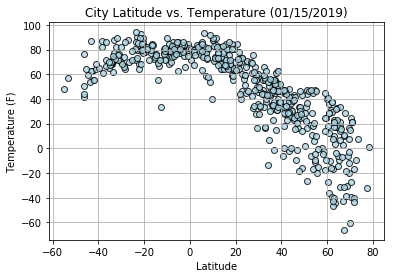

In [245]:
xvals = weather_df['Latitude']
yvals = weather_df['Current Temp (F)']

plt.title("City Latitude vs. Temperature (01/15/2019)")
plt.xlabel('Latitude')
plt.ylabel("Temperature (F)")
plt.scatter(xvals, yvals, marker="o", facecolors="lightblue", edgecolors="black", alpha=.8)
plt.grid()
plt.savefig("Images/City Latitude vs Temperature.png")
plt.show()

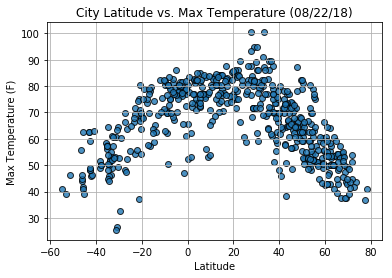

#### Latitude vs. Humidity Plot

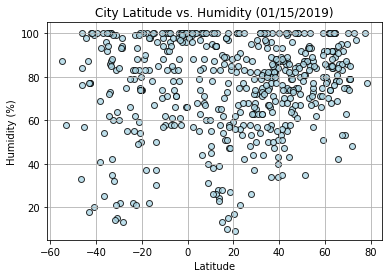

In [246]:
xvals = weather_df['Latitude']
yvals = weather_df['Humidity']

plt.title("City Latitude vs. Humidity (01/15/2019)")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.scatter(xvals, yvals, marker="o", facecolors="lightblue", edgecolors="black", alpha=.8)
plt.ylim(5, 105)
plt.grid()
plt.savefig("Images/City Latitude vs Humidity.png")
plt.show()

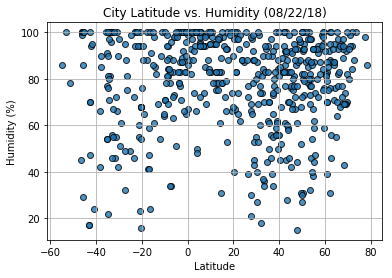

In [7]:
# example plot from starter notebook

#### Latitude vs. Cloudiness Plot

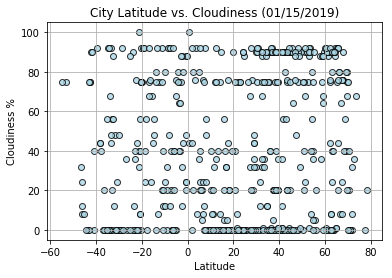

In [247]:
xvals = weather_df['Latitude']
yvals = weather_df['Clouds']

plt.title("City Latitude vs. Cloudiness (01/15/2019)")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness %")
plt.scatter(xvals, yvals, marker="o", facecolors="lightblue", edgecolors="black", alpha=.8)
plt.grid()
plt.savefig("Images/City Latitude vs Cloudiness.png")
plt.show()

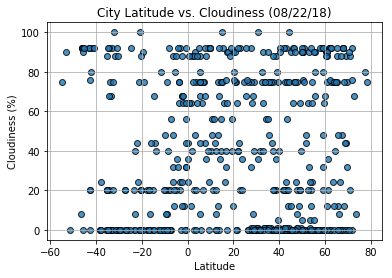

In [8]:
# example plot from starter notebook

#### Latitude vs. Wind Speed Plot

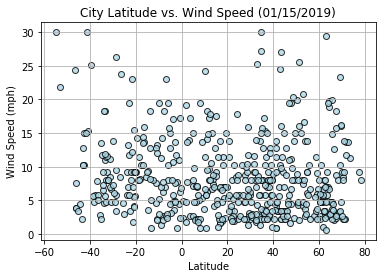

In [248]:
xvals = weather_df['Latitude']
yvals = weather_df['Wind']

plt.title("City Latitude vs. Wind Speed (01/15/2019)")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.scatter(xvals, yvals, marker="o", facecolors="lightblue", edgecolors="black", alpha=.8)
plt.grid()
plt.savefig("Images/City Latitude vs Wind Speed.png")
plt.show()

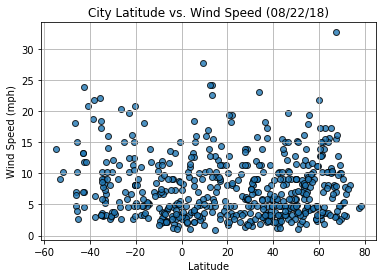

In [9]:
# example plot from starter notebook

In [251]:
# export weather data df to csv file
weather_df.to_csv('Weather_Data.csv', encoding='utf-8')

## Observable Trends:

    1. There doesn't seem to be any indication that the temperature is any warmer near the equator, however, temperatures do seem to be more consistent and don't fluctuate in temperature as much as other areas of the globe.
    2. The temperatures between 40-80° latitude seem colder overall and also seem to fluctuate a lot more than anywhere else on the globe.
    3. Similar to the weather, the humidity seems to be more consistent and ranges betweeen ~60-100%. It also looks to be higher overall towards the equator.
    4. Overall cloudiness doesn't seem to matter across the globe, and seems unaffected by global location.